# Processing of Membrane Operation and Feedwater Chemistry Data During Fouling Experiments

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flag_save = True

In [9]:
# locate files

experiment = 'saxs_exp04a'
#experiment = 'waxs_exp01'

master_path = '/global/cfs/cdirs/als/mwet/data/Landsman Temp/operando instrument paper/'


data_path = os.path.join(master_path, 'membrane_data', experiment)
save_path = os.path.join(master_path, 'membrane_analysis', experiment)
if flag_save:   os.makedirs(save_path, exist_ok=True)


In [10]:
# load data

data_file = os.path.join(data_path, 'data.csv')
data = pd.read_csv(data_file, header=None, skiprows=1)
data = data.rename(columns={0:'time', 1:'conductivity', 2:'pH', 3:'mV', 4:'temperature', 5:'flow_high', 6:'flow', 7:'pressure0', 8:'pressure1', 9:'flux'})

# some calculations
data['time_hr'] = data['time'] / 3600
data['tmp'] = (data['pressure0'] - data['pressure1']) / 14.5038


data['flux_avg'] = pd.Series(data['flux']).rolling(window=30).mean()#.dropna().tolist()

data['tmp_avg'] = pd.Series(data['tmp']).rolling(window=30).mean()#.dropna().tolist()

data['flux_LMH'] = (data['flux_avg'] * (1/1000) * (1/0.0017161) )

data['flux_LMHbar'] = (data['flux_avg'] * (1/1000) * (1/0.0017161) ) / (data['tmp_avg'])
# fix membrane area!!!!!  updated from mostafa 12/13/23






data

,time,conductivity,pH,mV,temperature,flow_high,flow,pressure0,pressure1,flux,time_hr,tmp,flux_avg,tmp_avg,flux_LMH,flux_LMHbar
0,0.0,22.55,6.12,40.8,21.7,0.001041,0.195652,43.883318,32.921189,308.80,0.000000,0.755811,NaN,NaN,NaN,NaN
1,5.0,22.55,6.12,40.8,21.7,0.001041,0.193786,44.230856,32.946465,308.51,0.001389,0.778030,NaN,NaN,NaN,NaN
2,10.0,22.54,6.12,40.9,21.7,0.000228,0.198450,42.114034,32.968581,308.89,0.002778,0.630556,NaN,NaN,NaN,NaN
3,15.0,22.53,6.12,40.9,21.7,-0.000179,0.196274,41.640119,32.889595,308.82,0.004167,0.603326,NaN,NaN,NaN,NaN
4,20.0,22.53,6.12,40.9,21.7,-0.000179,0.188811,42.745921,32.921189,308.84,0.005556,0.677390,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2255.0,21.74,5.67,67.1,21.6,0.001448,0.204357,51.655528,23.894683,309.00,0.626389,1.914039,308.783000,1.962297,179.932988,91.695079
452,2260.0,21.74,5.67,67.1,21.6,-0.000382,0.202181,51.813500,23.853611,308.88,0.627778,1.927763,308.779333,1.960634,179.930851,91.771755
453,2265.0,21.75,5.67,67.2,21.6,0.000228,0.201870,53.993510,23.799900,308.89,0.629167,2.081772,308.783667,1.963481,179.933376,91.640003
454,2270.0,21.75,5.67,67.2,21.6,0.000838,0.152745,11.783458,11.929903,266.17,0.630556,-0.010097,307.350667,1.901107,179.098343,94.207385


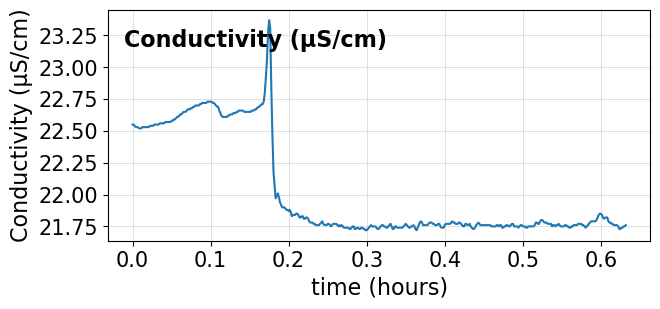

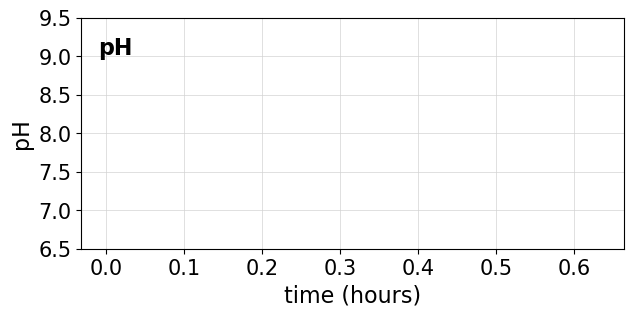

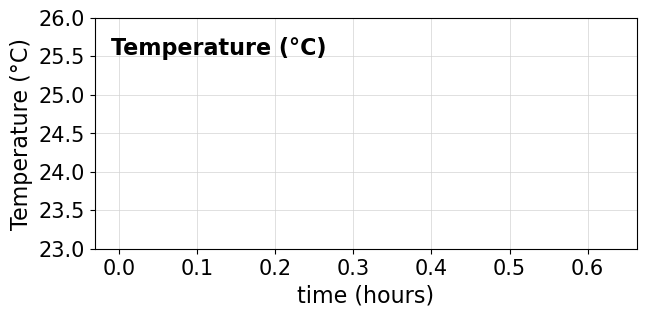

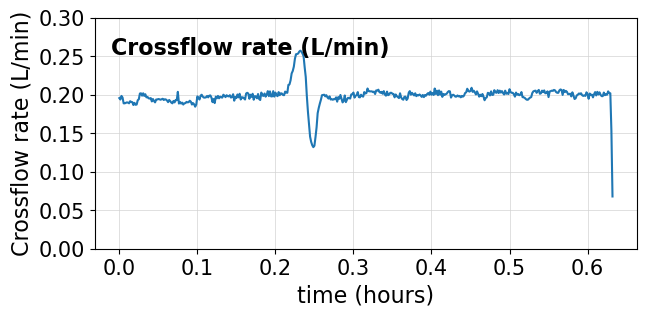

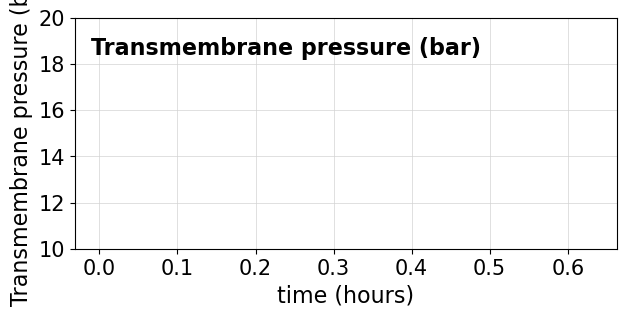

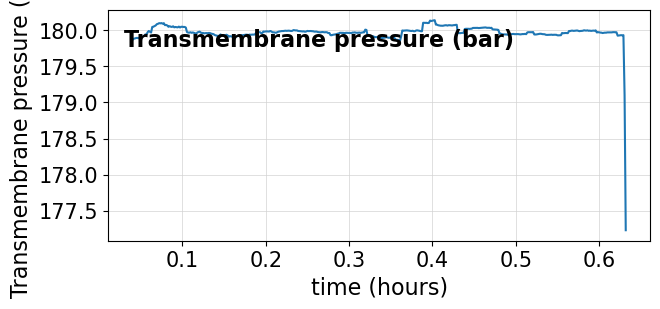

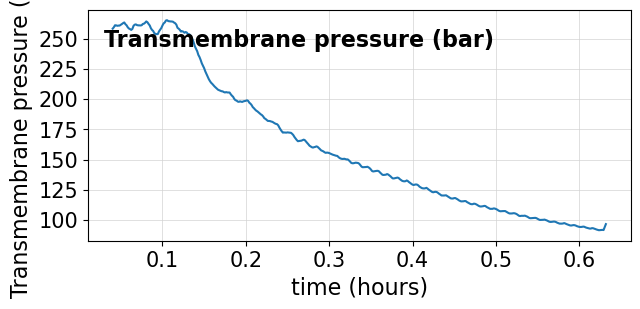

In [12]:

parameters = ['conductivity', 'pH', 'temperature', 'flow', 'tmp', 'flux_LMH', 'flux_LMHbar' ]

for parameter in parameters[:]:
    

    fig, ax = plt.subplots(figsize=(7,3))
    
        
    ax.plot(data['time_hr'], data[parameter])
    
    ax.grid(which='both', linestyle='-', linewidth=0.5, color='lightgrey')
 
    if parameter == 'pH':                     ax.set_ylim([6.5,9.5]); label = 'pH'; 
    if parameter == 'conductivity':           label = 'Conductivity (µS/cm)';  #ax.set_ylim([10300,10900]); 
    if parameter == 'temperature':           ax.set_ylim([23,26]); label = 'Temperature (°C)';  
    if parameter == 'flow':                  ax.set_ylim([0, 0.3]); label='Crossflow rate (L/min)';
    if parameter == 'tmp':                      ax.set_ylim([10, 20]); label='Transmembrane pressure (bar)';
   # if parameter == 'flux_LMHbar':             ax.set_ylim([3, 5]); label='Flux (LMH/bar)'
   # if parameter == 'flux_LMH':             ax.set_ylim([50, 100]); label='Flux (LMH)'

    data[parameter] = pd.to_numeric(data[parameter], errors='coerce')


    plt.xlabel('time (hours)', fontsize=16)  # Increase fontsize as needed
    plt.ylabel(label, fontsize=16)  # Increase fontsize as needed
    
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    ax.annotate(label, xy=(0.03, 0.84), xycoords='axes fraction', color='k', fontsize=16, weight='bold')

    
    if flag_save:
        
        fig.savefig(os.path.join(save_path, f'{experiment}_{parameter}_series.png'))

        np.savetxt(os.path.join(save_path, f'{experiment}_{parameter}_series.txt'), np.vstack((data['time_hr'], data[parameter])).T)
    